# What is medical imaging?

Medical imaging refers to techniques, standards and procedures that are used for imaging the interior of a body for clinical analysis and medical intervention, as well as visual representation of the function of some organs or tissues. Medical imaging seeks to reveal internal structures hidden by the skin and bones, as well as to diagnose and treat disease. Medical imaging also establishes a database of normal anatomy and physiology to make it possible to identify abnormalities.  

Medical imaging is very much essential and helpful in almost all medical setting and levels of healthcare helping physicians to arrive at more accurate diagnoses, prognoses and take correct treatment decisions.

Medical Imaging includes the following radiological imaging techniques such as:

- X-ray radiography
- Fluoroscopy
- Magnetic resonance imaging (MRI)
- Medical ultrasonography or ultrasound
- Endoscopy
- Elastography
- Tactile imaging
- Thermography


**Reference:** https://en.wikipedia.org/wiki/Medical_imaging

## Biomedical Imaging Coordinate System

Coordinate system is used for identifying the location of a point. Three types coordinate systems commonly used in imaging applications: 
- **World Coordinate**,
- **Anatomical Coordinate** (also called the Patient Coordinate System) and 
- **Medical Image Coordinate** systems.

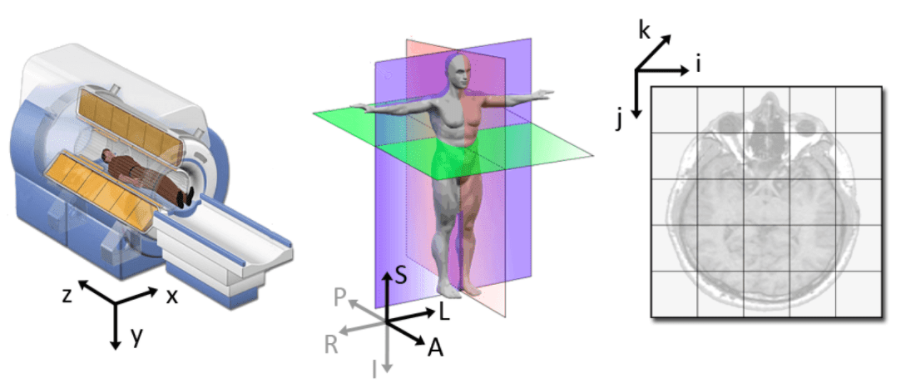


**Image Source** @ https://www.slicer.org/wiki/Coordinate_systems

### World Coordinate System

*The world coordinate system is typically a Cartesian coordinate system in which a model (e.g. a MRI scanner or a patient) is positioned. Every model has its own coordinate system but there is only one world coordinate system to define the position and orientation of each model.*

### Anatomical Coordinate System

*The most important model coordinate system for medical imaging techniques is the anatomical space. This space consists of **three planes** to describe the standard anatomical position of a human:*

***Axial Plane:*** *The axial plane is parallel to the ground and a slice near the head is referred to as **superior** while a slice closer to the feet, is known as the **inferior**. The axial plane is actually when you place point of view above the patient and look down. Depending on the region of the 3D medical image you will observe different anatomical structures.* The image below shows the Axial View of a CT scan of the chest - 

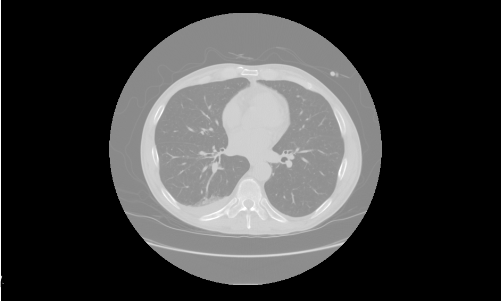

***Coronal Plane:*** *The coronal plane is perpendicular to the ground and separates the front from the back. In this, the point of view is either in front of eyes(**anterior plane**) or back of the patient(**posterior plane**).* The image below shows the Coronal View of a CT scan of the chest - 

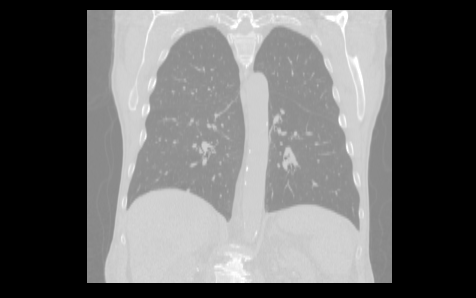

***Sagittal Plane:*** *The sagittal plane separates the Left from the Right. Basically, this is a side view. Instead of looking from above the patient, now we look from the side. The side can be either right or left. Which side and direction is the positive one, depends on the coordinate system.* The image below shows the Sagittal View of a CT scan of the chest -

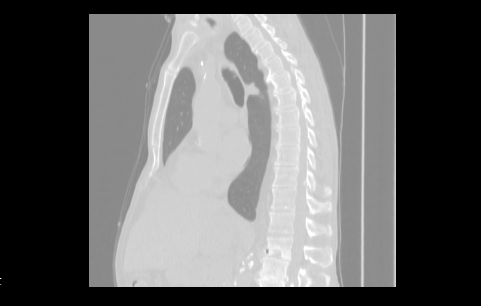

*The anatomical coordinate system is a continuous three-dimensional space in which an image has been sampled. In neuroimaging, it is common to define this space with respect to the human whose brain is being scanned. Hence the 3D basis is defined along the anatomical axes of anterior-posterior, inferior-superior, and left-right.*

**Image Source** @ All the above CT Chest images have been taken from [3D Slicer Smaple Data](https://slicer.kitware.com/midas3/item/126145) and viewed in the [3D slicer software](https://www.slicer.org/wiki/Main_Page)

### Medical Image Coordinate System (Voxel Space)

*The image coordinate system describes **how an image was acquired with respect to the anatomy**. Medical scanners create 3D arrays/tensors of points and cells which start at the upper left corner. `The i axis increases to the right, the j axis to the bottom and the k axis backwards.`*

*In addition to the intensity value of each voxel (i, j, k), the origin and spacing of the anatomical coordinates are stored in the form of metadata. `The origin represents the position of the first voxel (0,0,0) in the anatomical coordinate system and the spacing specifies the distance between voxels along each axis`. Using the origin and spacing, the corresponding position of each (image coordinate) voxel in anatomical coordinates can be calculated.*

*`Voxel spacing is basically the real size of the voxel that corresponds to a 3D region and the distance between two voxels.`*

**References:** 

[1] https://www.slicer.org/wiki/Coordinate_systems#World_coordinate_system

[2] https://theaisummer.com/medical-image-coordinates/

[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3354356/ (Managing DICOM images: Tips and tricks for the radiologist)

## DICOM

**DICOM** defines standards for storing data in memory and on disk, and for communicating this data between machines over a network. DICOM files are binary dumps of the objects in memory that DICOM sends across the network.

A DICOM image file is an outcome of the **Digital Imaging and COmmunications in Medicine** standard and represented as **`.dcm`**. It is a standard, internationally accepted format to view, store, retrieve and share medical images. DICOM differs from other image formats because it groups information into datasets. DICOM file consist of **header** and **image data** collectively in one file. 

The header metadata consists of data that describes the image, and the patient data. Patient data could include information about the patient’s demographic information like name, age, gender, and date of birth. The metadata may also contain information about image characteristics such as acquisition parameters, pixel intensity, matrix size, and dimensions of the image, type of the image (CT, MRI, etc..), the context of the imaging study, etc... These metadata information are coded onto the image so that the patient to whom the image belongs can be easily identified.

**DICOM Communications Protocol -**
DICOM not only defines the image and metadata but also the transport layer protocol that enables easy communication and passage of information through the network. The entire standard is made up of multiple related but independent sections. Nevertheless, all medical imaging applications that are connected to the hospital network use the DICOM protocol to exchange information, which is mainly DICOM images.

## Pydicom and NiBabel

Medical image data are coded in 2 formats, **DICOM** and **NIfTI** formats are used. 
- **DICOM** format has multiple 2d image slices which together form a 3d image.
- **NIfTI** format has only one file that contains the 3d image. 

**Pydicom** and **NiBabel** are libraries to dela with the DICOM and NIfTI images respectively. Both libraries load the images in a numpy array format, which makes it easy to extract and save 2d images in the jpg format.

## Analyze DICOM Images

**pydicom** a Python package developed for working with DICOM files and images contains APIs for reading, viewing, modifying the dcm files and objects. Pydicom provides an interface to read the complex DICOM files for easy interpretation.
It contains APIs to manipulate image and metadata contained in the DICOM files.

### Installing Pydicom

In [1]:
#!pip install pydicom

In [2]:
import pydicom
import numpy as np
from matplotlib import pyplot, cm

### Reading .dcm Files

- **dcmread( ... ):** Read and parse a DICOM dataset stored in the DICOM File Format. It returns an instance of FileDataset that represents a parsed DICOM file.

In [3]:
filename = "data\ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicomData = pydicom.dcmread(filename)
dicomData

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

### Read Metadata

As discussed in the sections above, the metadata includes the **patient's demographic information** and the details about the CT modality and other details which can be seen in the result above.  All the metadata details can be accessed using Pydicom which creates attributes with the same names and assigns appropriate values.

Some of the metadata can be seen below -

In [4]:
print("DICOM Metadata")
print("--------------")
print("Modality: {}\nManufacturer: {}\nPatient ID: {}\nPatient Name: {}\nPatient DOB: {}\
      \nPatient Age: {}\nPatient Sex: {}\nBody Part Examined: {}\nImage Type: {}"
      .format(
          dicomData.Modality, 
          dicomData.Manufacturer,
          dicomData.PatientID,
          dicomData.PatientName,
          dicomData.PatientBirthDate,
          dicomData.PatientAge,
          dicomData.PatientSex,
          dicomData.BodyPartExamined,
          dicomData.ImageType))

DICOM Metadata
--------------
Modality: CT
Manufacturer: SIEMENS
Patient ID: TCGA-17-Z034
Patient Name: TCGA-17-Z034
Patient DOB:       
Patient Age: 060Y
Patient Sex: M
Body Part Examined: CHEST
Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL']


As the metadata reveals, this is a **CT** scan of the subject's **chest** taken in the **AXIAL** plane.

In [5]:
# Used with a context manager
# with pydicom.dcmread(filename) as ds:
#     ds.PatientName

### Viewing Image Files

The image pixel data information is stored as part of the **pixel_array** metadata and can be extracted by reading the metadata. 

In [6]:
image = dicomData.pixel_array

print("Shape of the extracted DICOM image:", image.shape)
print("Minimum pixel value:", image.min())
print("Maximum pixel value:", image.max())

Shape of the extracted DICOM image: (512, 512)
Minimum pixel value: 0
Maximum pixel value: 1918


The image only has two dimensions since the DICOM files only contains one slice per file. The complete DICOM image consists of multiple slices and each slice is a `.dcm` file format.

<Figure size 432x288 with 0 Axes>

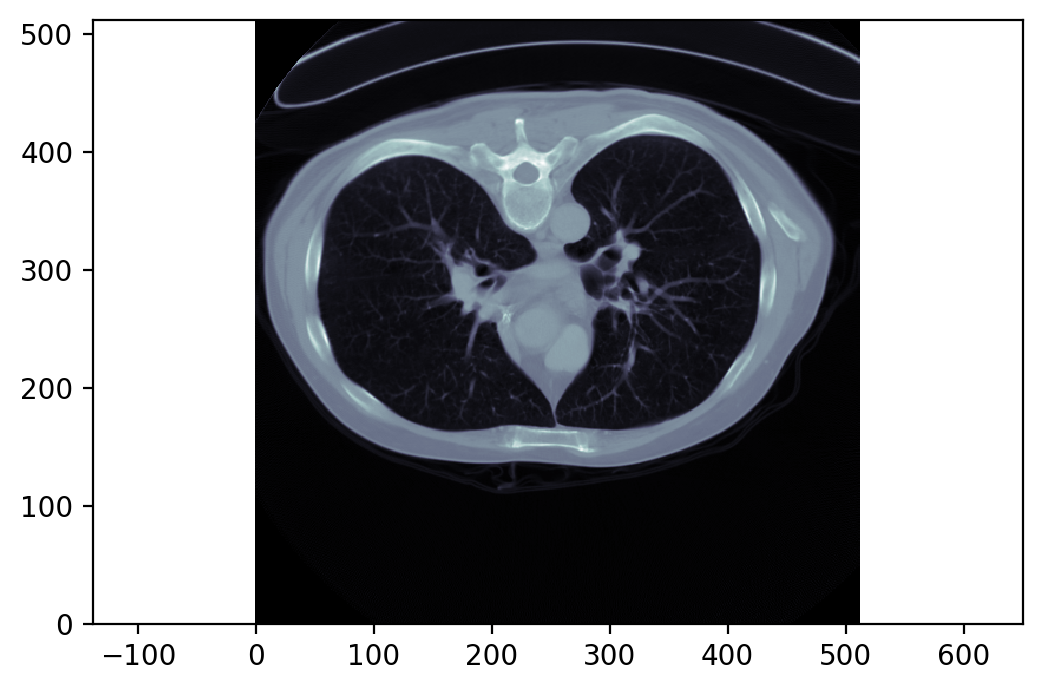

In [7]:
def plot_image(image, cm = pyplot.bone()):
    
    pyplot.figure(dpi=200)
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(cm)
    pyplot.pcolormesh(image)

plot_image(image)

### Modifying Metadata

A metadata value of any element can be modified by retrieving it and setting the value.

In [8]:
dicomData.PatientName = "Test, Patient"
dicomData.PatientID = "956789320"
dicomData.PatientAge = 34

In [9]:
print("DICOM Metadata")
print("--------------")
print("Modality: {}\nManufacturer: {}\nPatient ID: {}\nPatient Name: {}\nPatient DOB: {}\
      \nPatient Age: {}\nPatient Sex: {}\nBody Part Examined: {}\nImage Type: {}"
      .format(
          dicomData.Modality, 
          dicomData.Manufacturer,
          dicomData.PatientID,
          dicomData.PatientName,
          dicomData.PatientBirthDate,
          dicomData.PatientAge,
          dicomData.PatientSex,
          dicomData.BodyPartExamined,
          dicomData.ImageType))

DICOM Metadata
--------------
Modality: CT
Manufacturer: SIEMENS
Patient ID: 956789320
Patient Name: Test, Patient
Patient DOB:       
Patient Age: 34
Patient Sex: M
Body Part Examined: CHEST
Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL']


### Important Metadata

- **Pixel Data (7fe0 0010)** — This is where the raw pixel data is stored. The order of pixels encoded for each image plane is left to right, top to bottom, i.e., the upper left pixel (labeled 1,1) is encoded first.

- **Photometric Interpretation (0028, 0004)** — aka color space. In this case it is MONOCHROME2 where pixel data is represented as a single monochrome image plane where the minimum sample value is intended to be displayed as black info.

- **Samples per Pixel (0028, 0002)** — This should be 1 as this image is monochrome. This value would be 3 if the color space was RGB for example.

- **Bits Stored (0028 0101)** — Number of bits stored for each pixel sample

- **Pixel Represenation (0028 0103)** — can either be unsigned(0) or signed(1)

- **Rescale Intercept (0028, 1052)** — where the value b in relationship between stored values (SV) and the output units. Output units = m*SV + b .

- **Rescale Slope (0028, 1053)** — m in the equation specified by Rescale Intercept (0028,1052).

The RescaleIntercept and RescaleSlope are applied to transform the pixel values of the image into values that are meaningful to the application. Calculating the new values usually follow a linear formula:
                    `NewValue = ( RawPixelValue * RescaleSlope ) + RescaleIntercept`
                    
More information about the various metadata tags can be found here @ https://www.dicomlibrary.com/dicom/dicom-tags/